| <p style="text-align: left;">Name</p>               | Matr.Nr. | <p style="text-align: right;">Date</p> |
| --------------------------------------------------- | -------- | ------------------------------------- |
| <p style="text-align: left">Fathy Shalaby </p> | 11701175 | 21.04.2020                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 5 -- Recurrent Neural Networks </h2>

<b>Authors</b>: Brandstetter, Lehner <br>
<b>Date</b>: 20-04-2020

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0

- Import the same modules as discussed in the lecture notebook.
- Check if your model versions are correct.
- Use your GPU if available.

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('drive/My Drive/u5')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# your imports go here
import u5_utils as u5

import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys

In [0]:
# model version checks
u5.check_module_versions()

Installed Python version: 3.6 (✗)
Installed numpy version: 1.18.3 (✓)
Installed matplotlib version: 3.2.1 (✓)
Installed PyTorch version: 1.5.0+cu101 (✓)


In [0]:
# your cuda check goes here
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print("Device:", device)

Device: cuda


<h1 style="color:rgb(208,90,80)">ATTENTION</h1>
<span style="color:rgb(208,90,80)">Running this notebook might take a considerable amount of time, even with GPUs. To reduce the amount of time you can decrease the number of samples in the training dataset (N_SAMPLES) and the epochs which are used for training (EPOCHS). <br><br> However reducing the number of samples and epochs loses the insights of this notebook.</span>

<h1 style="color:rgb(208,90,80)">HANDING IN THE NOTEBOOK</h1>
<span style="color:rgb(208,90,80)">For handing in the notebook please set N_SAMPLES=32 and EPOCHS=51!</span>

# Exercise 1

- Generate one-hot encoded sequences with a sequence length of 10 and 12 different classes (as it is done in the lecture notebook) where each sequence contains a series of three zeros and where the digit after these three zeros is the target.
- Print the last three elements of the trainset.

In [0]:
# your hyperparameters go here
N_CLASSES = 12
SEQ_LEN = 10
N_SAMPLES = 32
EPOCHS=51
CODE_POS = 0

In [0]:
# your dataloaders go here
trainset = u5.StringCode(n_samples=N_SAMPLES, n_classes=N_CLASSES, seq_len=SEQ_LEN, code_pos=CODE_POS, dev=device)
testset = u5.StringCode(n_samples=N_SAMPLES, n_classes=N_CLASSES, seq_len=SEQ_LEN, code_pos=CODE_POS, dev=device)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

print(trainset[:-3])

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]],

        ...,

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,

# Exercise 2

- Try to solve the above generated task by a Logistic Regression model
- Report your results on the training set after each epoch.
- Run you final model on the test set, also report your results.

In [0]:
class MyLR(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyLR, self).__init__()
        
        # your code goes here
        self.model = nn.Sequential(
            nn.Linear(input_size, output_size,bias=True),

        )
        
    def forward(self, x):
        # your forward goes here
        out = self.model(x)
        return out

In [0]:
# initialize your model
logistic_regression_model = MyLR(input_size=N_CLASSES*SEQ_LEN, output_size=N_CLASSES).to(device)

In [0]:
# print your model
logistic_regression_model

MyLR(
  (model): Sequential(
    (0): Linear(in_features=120, out_features=12, bias=True)
  )
)

In [0]:
np.random.seed(42)
torch.manual_seed(42)

optimizer = optim.Adam(logistic_regression_model.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
for epoch in range(EPOCHS):
    
    # Train NN for one epoch.
    _ = u5.train_network(model=logistic_regression_model, data_loader=trainloader,
                     device=device, optimizer=optimizer, recurrent=False)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=logistic_regression_model, data_loader=trainloader, device=device, recurrent=False)
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
              f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=logistic_regression_model, data_loader=testloader, device=device, recurrent=False)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

Epoch: 01 / Loss: 0.0768 / Trainings accuracy: 0.1250
Epoch: 11 / Loss: 0.0701 / Trainings accuracy: 0.3750
Epoch: 21 / Loss: 0.0678 / Trainings accuracy: 0.4375
Epoch: 31 / Loss: 0.0608 / Trainings accuracy: 0.7188
Epoch: 41 / Loss: 0.0531 / Trainings accuracy: 0.8438
Epoch: 51 / Loss: 0.0497 / Trainings accuracy: 0.9062

Final loss: 0.0487 / Test accuracy: 0.9375


# Exercise 3

- Increase the sequence length to 15
- Place the code at a random position in the sequence
- Print the elements 5,6 of the trainset.
- Try again to solve the above generated task by a Logistic Regression model
- Report your results on the training set after each epoch.
- Run you final model on the test set, also report your results.

In [0]:
# your dataloaders go here

CODE_POS = None
SEQ_LEN = 15


trainset = u5.StringCode(n_samples=N_SAMPLES, n_classes=N_CLASSES, seq_len=SEQ_LEN, code_pos=CODE_POS, dev=device)
testset = u5.StringCode(n_samples=N_SAMPLES, n_classes=N_CLASSES, seq_len=SEQ_LEN, code_pos=CODE_POS, dev=device)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

print(trainset[5],trainset[6])

(tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]), tensor(11), '5') (tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

In [0]:
np.random.seed(42)
torch.manual_seed(42)

logistic_regression_model = MyLR(input_size=N_CLASSES*SEQ_LEN, output_size=N_CLASSES).to(device)
optimizer = optim.Adam(logistic_regression_model.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
for epoch in range(EPOCHS):

    # Train NN for one epoch.
    _ = u5.train_network(model=logistic_regression_model, data_loader=trainloader,
                     device=device, optimizer=optimizer, recurrent=False)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=logistic_regression_model, data_loader=trainloader, device=device, recurrent=False)
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
              f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=logistic_regression_model, data_loader=testloader, device=device, recurrent=False)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

Epoch: 01 / Loss: 0.0765 / Trainings accuracy: 0.0625
Epoch: 11 / Loss: 0.0756 / Trainings accuracy: 0.1875
Epoch: 21 / Loss: 0.0716 / Trainings accuracy: 0.2812
Epoch: 31 / Loss: 0.0710 / Trainings accuracy: 0.3125
Epoch: 41 / Loss: 0.0625 / Trainings accuracy: 0.4688
Epoch: 51 / Loss: 0.0621 / Trainings accuracy: 0.3750

Final loss: 0.0599 / Test accuracy: 0.4375


# Exercise 4

- Now try to solve this task of sequence length 15 with a vanilla RNN 
- Use the same RNN structure as discussed in the lecture notebook
- Report your results on the training set after each epoch.
- Run you final model on the test set, also report your results
- Plot the gradients with respect to the inputs

In [0]:
class MyRNN(nn.Module):
    def __init__(self, input_size, num_rnn_cells, num_layers, num_classes):
        super(MyRNN, self).__init__()
        self.rnn = nn.RNN(input_size, num_rnn_cells, num_layers, batch_first=True)
        self.fc = nn.Linear(num_rnn_cells, num_classes)
    
    def forward(self, x): 
        out, _ = self.rnn(x)     
        # Decode the hidden state of the last time step
        return self.fc(out[:, -1, :])

In [0]:
# initialize your model
recurrent_neural_network_model = MyRNN(input_size=N_CLASSES, num_rnn_cells=N_CLASSES*2, num_layers=1, num_classes=N_CLASSES).to(device)

In [0]:
# print your model
recurrent_neural_network_model

MyRNN(
  (rnn): RNN(12, 24, batch_first=True)
  (fc): Linear(in_features=24, out_features=12, bias=True)
)

In [0]:
np.random.seed(42)
torch.manual_seed(42)

recurrent_neural_network_model = MyRNN(input_size=N_CLASSES, num_rnn_cells=N_CLASSES, num_layers=1, num_classes=N_CLASSES).to(device) #don't know why but ok 
optimizer = optim.Adam(recurrent_neural_network_model.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
gradients_rnn = []
for epoch in range(EPOCHS):
    
    # Train NN for one epoch.
    gradients = u5.train_network(model=recurrent_neural_network_model, data_loader=trainloader,
                     device=device, optimizer=optimizer, recurrent=True)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=recurrent_neural_network_model, data_loader=trainloader, device=device, recurrent=True)
        
        # append gradients
        if (epoch < 101):
            gradients_rnn.append([epoch,gradients])
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
              f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=recurrent_neural_network_model, data_loader=testloader, device=device, recurrent=True)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')


Epoch: 01 / Loss: 0.0782 / Trainings accuracy: 0.0625
Epoch: 11 / Loss: 0.0774 / Trainings accuracy: 0.0625
Epoch: 21 / Loss: 0.0777 / Trainings accuracy: 0.0625
Epoch: 31 / Loss: 0.0765 / Trainings accuracy: 0.1562
Epoch: 41 / Loss: 0.0773 / Trainings accuracy: 0.1875
Epoch: 51 / Loss: 0.0759 / Trainings accuracy: 0.1875

Final loss: 0.0749 / Test accuracy: 0.1250


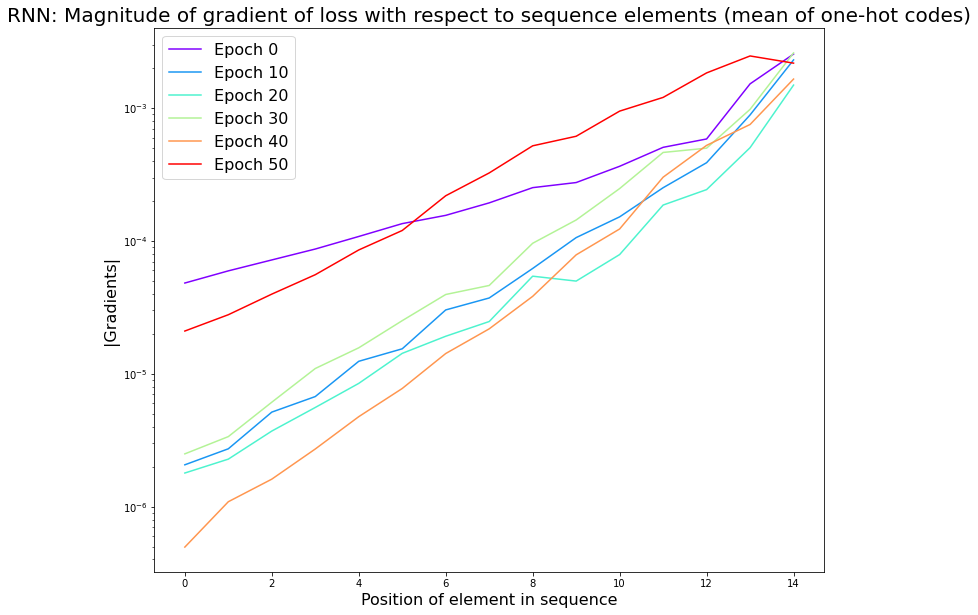

In [0]:
# your gradient plot goes here
u5.plt_gradients(gradients_rnn,"RNN")

# Exercise 5

- Now try to solve this task of sequence length 15 with an LSTM 
- Use the same LSTM structure as discussed in the lecture notebook
- Report your results on the training set after each epoch.
- Run you final model on the test set, also report your results
- Plot the gradients with respect to the inputs

In [0]:
class MyLSTM(nn.Module):
    def __init__(self, input_size, num_lstm_cells, num_layers, num_classes):
        super(MyLSTM, self).__init__()
        
        # your code goes here
        self.rnn = nn.LSTM(input_size, num_lstm_cells, num_layers, batch_first=True)
        self.fc = nn.Linear(num_lstm_cells, num_classes)
    
    def deactivateFG(self):
        for names in self.rnn._all_weights:
            for name in filter(lambda n: "bias" in n, names):
                bias = getattr(self.rnn, name)
                n = bias.size(0)
                start, end = n // 4, n // 2
                bias.data[start:end].fill_(1e4)
    
    def forward(self, x):
        # your forward goes here
        out, _ = self.rnn(x)     
        # Decode the hidden state of the last time step
        return self.fc(out[:, -1, :])

In [0]:
np.random.seed(42)
torch.manual_seed(42)

lstm_neural_network_model = MyLSTM(input_size=N_CLASSES, num_lstm_cells=N_CLASSES, num_layers=1, num_classes=N_CLASSES)
lstm_neural_network_model.deactivateFG()
lstm_neural_network_model = lstm_neural_network_model.to(device)
optimizer = optim.Adam(lstm_neural_network_model.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
gradients_lstm = []
for epoch in range(EPOCHS):
    
    # Train NN for one epoch.
    gradients = u5.train_network(model=lstm_neural_network_model, data_loader=trainloader,
                     device=device, optimizer=optimizer, recurrent=True)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=lstm_neural_network_model, data_loader=trainloader, device=device, recurrent=True)
    
        # append gradients
        if (epoch < 101):
            gradients_lstm.append([epoch,gradients])
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
            f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=lstm_neural_network_model, data_loader=testloader, device=device, recurrent=True)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

Epoch: 01 / Loss: 0.0783 / Trainings accuracy: 0.1250
Epoch: 11 / Loss: 0.0765 / Trainings accuracy: 0.0312
Epoch: 21 / Loss: 0.0764 / Trainings accuracy: 0.1250
Epoch: 31 / Loss: 0.0754 / Trainings accuracy: 0.0938
Epoch: 41 / Loss: 0.0780 / Trainings accuracy: 0.0625
Epoch: 51 / Loss: 0.0751 / Trainings accuracy: 0.1875

Final loss: 0.0772 / Test accuracy: 0.0938


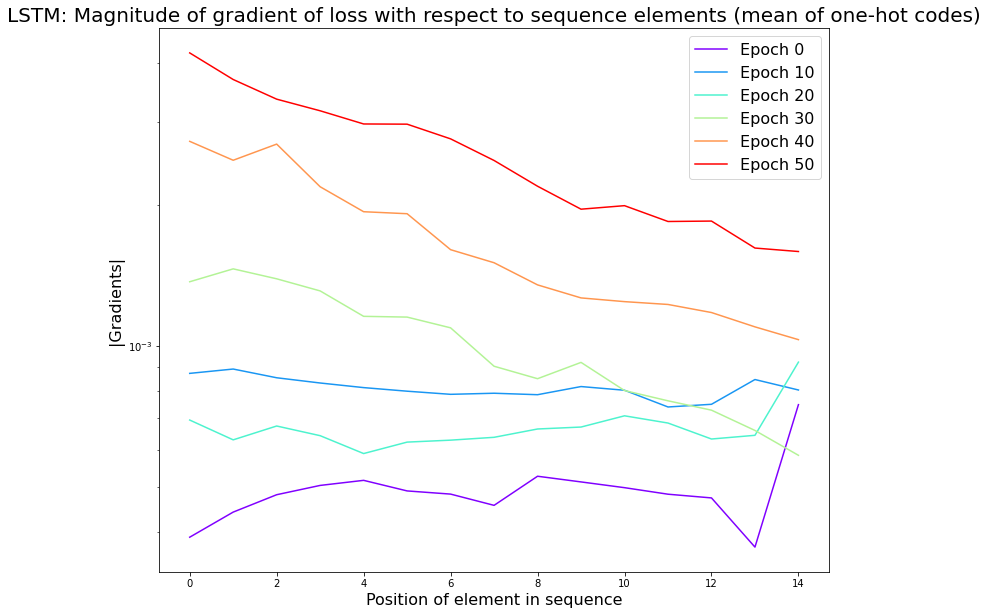

In [0]:
# your gradient plot goes here
u5.plt_gradients(gradients_lstm,"LSTM")

# Exercise 6

- Compare the number of parameters of the three different models. Which one has the most?

In [0]:
# your code goes here


total_params_fnn = u5.count_parameters(logistic_regression_model)
total_params_rnn = u5.count_parameters(recurrent_neural_network_model)
total_params_lstm = u5.count_parameters(lstm_neural_network_model)

print(f'Trainable parameters Feed-Forward Neural Network {total_params_fnn} \nTrainable parameters RNN {total_params_rnn} \nTrainable parameters LSTM {total_params_lstm}')

Trainable parameters Feed-Forward Neural Network 2172 
Trainable parameters RNN 468 
Trainable parameters LSTM 1404


# Exercise 7

- Double the number of LSTM cells. How does the number of parameters change?

In [0]:
# your code goes here
lstm_neural_network_model = MyLSTM(input_size=N_CLASSES, num_lstm_cells=N_CLASSES*2, num_layers=1, num_classes=N_CLASSES)
lstm_neural_network_model.deactivateFG()
lstm_neural_network_model = lstm_neural_network_model.to(device)
optimizer = optim.Adam(lstm_neural_network_model.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
gradients_lstm = []
for epoch in range(EPOCHS):
    
    # Train NN for one epoch.
    gradients = u5.train_network(model=lstm_neural_network_model, data_loader=trainloader,
                     device=device, optimizer=optimizer, recurrent=True)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=lstm_neural_network_model, data_loader=trainloader, device=device, recurrent=True)
    
        # append gradients
        if (epoch < 101):
            gradients_lstm.append([epoch,gradients])
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
            f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=lstm_neural_network_model, data_loader=testloader, device=device, recurrent=True)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

Epoch: 01 / Loss: 0.0775 / Trainings accuracy: 0.0625
Epoch: 11 / Loss: 0.0807 / Trainings accuracy: 0.0938
Epoch: 21 / Loss: 0.0788 / Trainings accuracy: 0.0625
Epoch: 31 / Loss: 0.0808 / Trainings accuracy: 0.1562
Epoch: 41 / Loss: 0.0754 / Trainings accuracy: 0.0938
Epoch: 51 / Loss: 0.0747 / Trainings accuracy: 0.1562

Final loss: 0.0749 / Test accuracy: 0.2500


In [0]:
total_params_lstm = u5.count_parameters(lstm_neural_network_model)
print(f'Trainable parameters Feed-Forward Neural Network {total_params_fnn} \nTrainable parameters RNN {total_params_rnn} \nTrainable parameters LSTM {total_params_lstm}')

Trainable parameters Feed-Forward Neural Network 2172 
Trainable parameters RNN 468 
Trainable parameters LSTM 3948
